# Loan Default Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Reading data

In [3]:
data=pd.read_csv("train_LZV4RXX.csv")
data.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0


In [4]:
data.shape

(7000, 10)

### data.info() it basic information about data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_id           7000 non-null   int64  
 1   age               7000 non-null   int64  
 2   education         6755 non-null   float64
 3   proof_submitted   7000 non-null   object 
 4   loan_amount       7000 non-null   int64  
 5   asset_cost        7000 non-null   int64  
 6   no_of_loans       7000 non-null   int64  
 7   no_of_curr_loans  7000 non-null   int64  
 8   last_delinq_none  7000 non-null   int64  
 9   loan_default      7000 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 547.0+ KB


In [6]:
loan_ID=data["loan_id"]

In [7]:
loan_ID.shape

(7000,)

In [8]:
data=data.drop("loan_id",axis=1)

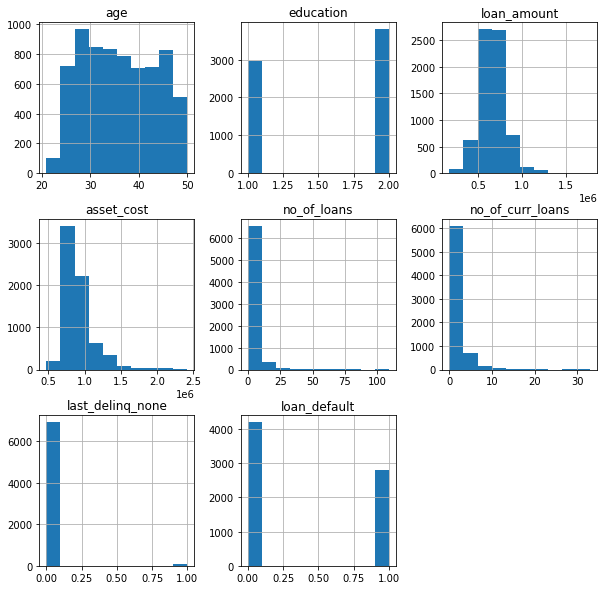

In [14]:
#plt.figure(figsize=(35,35))
data.hist(figsize=[10,10])
plt.show()

In [31]:
data.isnull().sum()

age                   0
education           245
proof_submitted       0
loan_amount           0
asset_cost            0
no_of_loans           0
no_of_curr_loans      0
last_delinq_none      0
loan_default          0
dtype: int64

In [32]:
print(data["education"].unique())

[ 1.  2. nan]


### filling the missing using basic method

In [33]:
data["education"]=data["education"].fillna(data["education"].mode()[0])

### data describe gives basic understanding of the data

In [34]:
data.describe()

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
count,7000.000000,7000.000000,7.000000e+03,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000
mean,36.096571,1.577286,6.633552e+05,9.162998e+05,2.853286,1.371143,0.013286,0.400000
std,7.587700,0.494026,1.498128e+05,2.144922e+05,5.471932,2.189278,0.114504,0.489933
min,21.000000,1.000000,1.678800e+05,4.733520e+05,0.000000,0.000000,0.000000,0.000000
25%,29.000000,1.000000,5.777880e+05,7.979010e+05,0.000000,0.000000,0.000000,0.000000
50%,36.000000,2.000000,6.571080e+05,8.584260e+05,0.000000,0.000000,0.000000,0.000000
75%,43.000000,2.000000,7.373640e+05,9.576750e+05,3.000000,2.000000,0.000000,1.000000
max,50.000000,2.000000,1.781376e+06,2.419200e+06,109.000000,33.000000,1.000000,1.000000


## Checking corelation  

##### here it showes relation between the variables

In [35]:
data.corr()

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
age,1.000000,0.058155,-0.058011,-0.122741,0.193026,0.184503,0.050325,-0.029571
education,0.058155,1.000000,0.000562,0.089290,0.020395,-0.002614,0.023521,0.039905
loan_amount,-0.058011,0.000562,1.000000,0.735176,0.010867,0.014788,-0.009412,0.115736
asset_cost,-0.122741,0.089290,0.735176,1.000000,-0.052643,-0.054021,-0.023489,0.048020
no_of_loans,0.193026,0.020395,0.010867,-0.052643,1.000000,0.774705,0.235024,-0.045738
no_of_curr_loans,0.184503,-0.002614,0.014788,-0.054021,0.774705,1.000000,0.272716,-0.057306
last_delinq_none,0.050325,0.023521,-0.009412,-0.023489,0.235024,0.272716,1.000000,0.014772
loan_default,-0.029571,0.039905,0.115736,0.048020,-0.045738,-0.057306,0.014772,1.000000


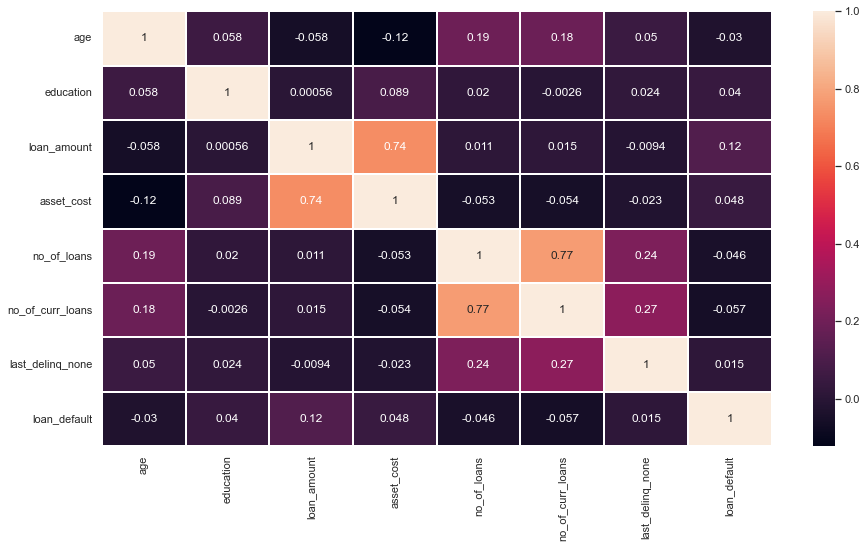

In [36]:

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data.corr(),annot=True,linewidths=0.1)
plt.show()


## data visualization

In [37]:
data.columns

Index(['age', 'education', 'proof_submitted', 'loan_amount', 'asset_cost',
       'no_of_loans', 'no_of_curr_loans', 'last_delinq_none', 'loan_default'],
      dtype='object')

0    4200
1    2800
Name: loan_default, dtype: int64


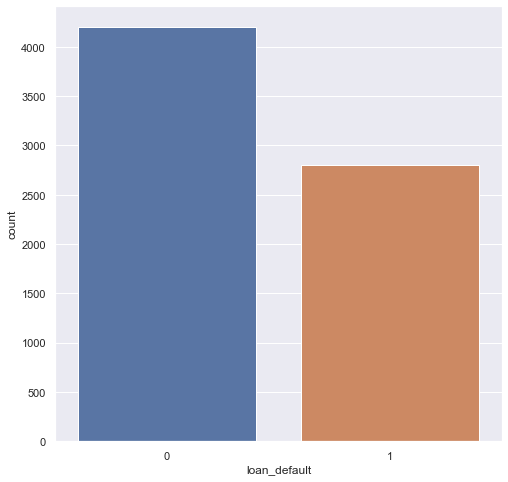

In [38]:
plt.figure(figsize=(8,8))
print(data['loan_default'].value_counts())
sns.countplot(data['loan_default'])
plt.show()

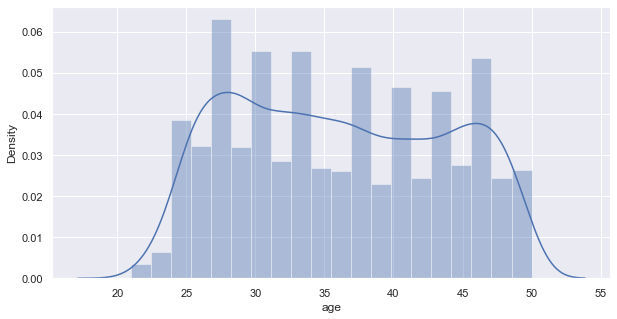

In [39]:
plt.figure(figsize=(10,5))
sns.distplot(data['age'])
plt.show()

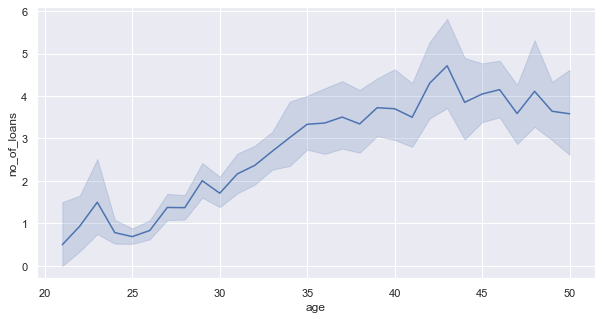

In [40]:
plt.figure(figsize=(10,5))
sns.lineplot( data['age'], data['no_of_loans'])
plt.show()

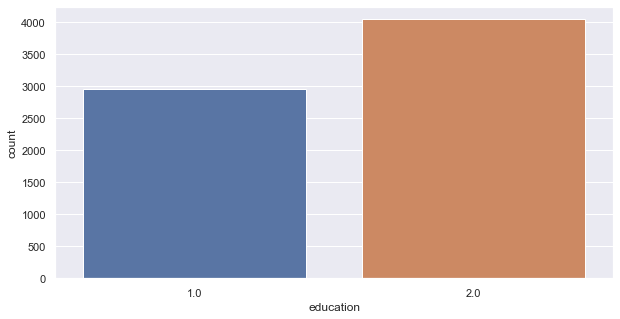

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(data['education'])
plt.show()

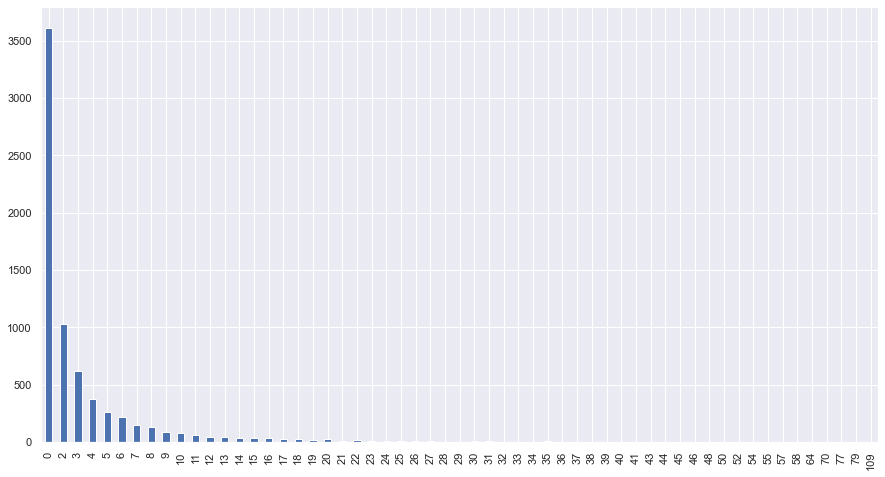

In [42]:
data['no_of_loans'].value_counts().sort_index().plot.bar()
plt.show()

In [43]:
data.columns

Index(['age', 'education', 'proof_submitted', 'loan_amount', 'asset_cost',
       'no_of_loans', 'no_of_curr_loans', 'last_delinq_none', 'loan_default'],
      dtype='object')

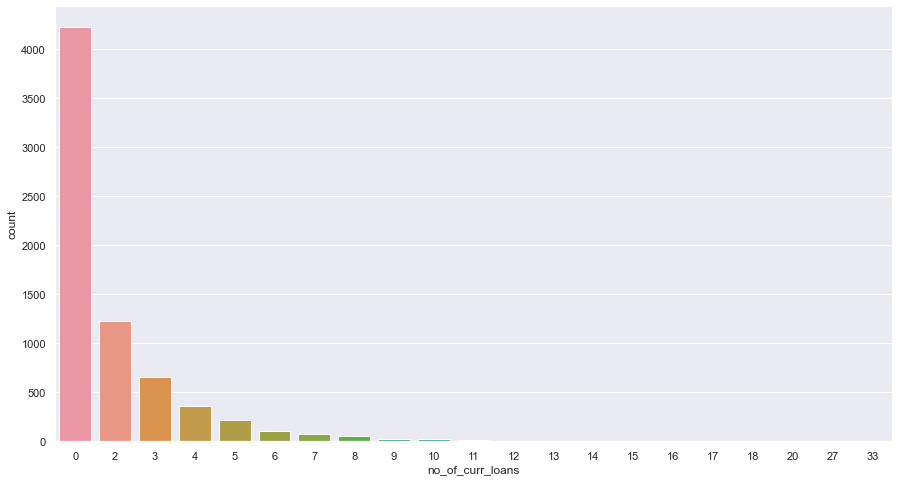

In [44]:
sns.countplot(data['no_of_curr_loans'], data=data)
plt.show()

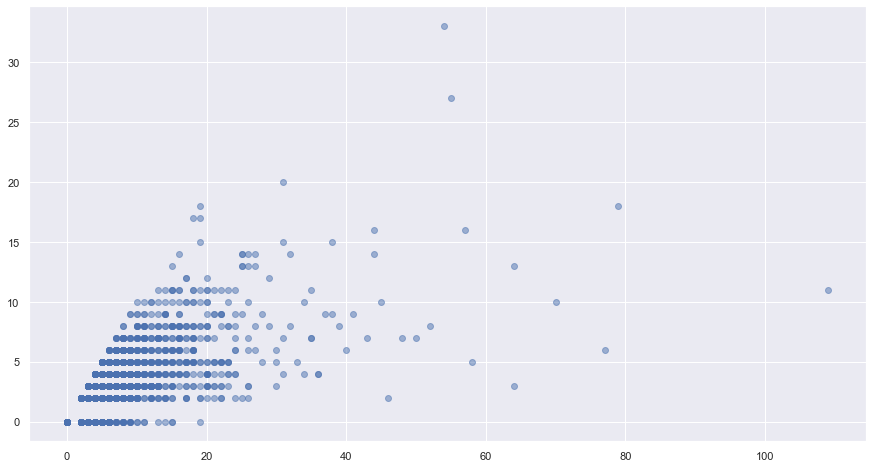

In [45]:
plt.scatter(data['no_of_loans'],data['no_of_curr_loans'],alpha=0.5 )
plt.show()

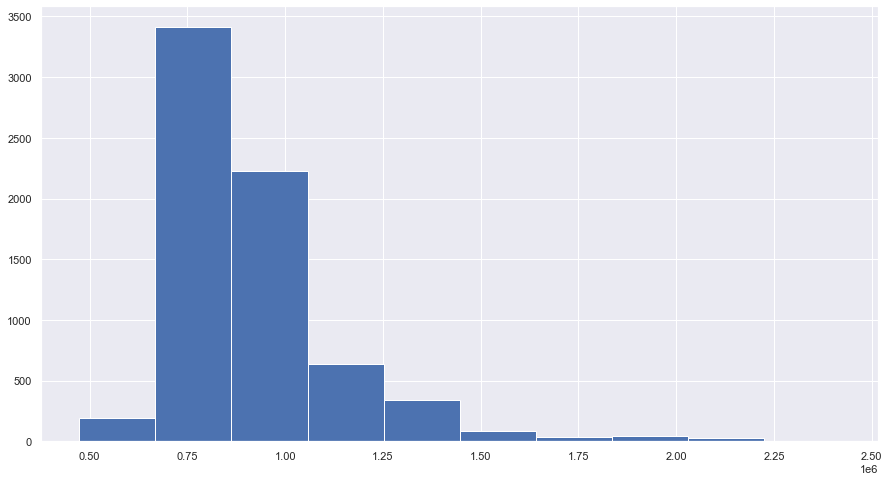

In [46]:
plt.hist(data["asset_cost"])
plt.show()

In [47]:
train_data=data.copy(deep=True)

## Data Preprocessing

In [48]:
train_data= pd.get_dummies(train_data,drop_first=True)
train_data.head()

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,proof_submitted_Driving,proof_submitted_PAN,proof_submitted_Passport,proof_submitted_VoterID
0,27,1.0,504264,820920,2,2,0,0,0,0,0,0
1,48,1.0,728556,831444,6,2,0,0,0,0,0,0
2,30,2.0,642936,826092,0,0,0,1,0,0,0,1
3,28,1.0,746556,930924,0,0,0,0,0,0,0,0
4,29,1.0,1139880,1902000,0,0,0,0,0,0,0,0


In [49]:
X=train_data.drop(["loan_default"],axis=1)
Y=train_data["loan_default"]

## data balancing using smote (over sampling)

In [50]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 1)
X1,Y1 = smote.fit_resample(X,Y)
Y1.value_counts()

0    4200
1    4200
Name: loan_default, dtype: int64

## train test split

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,Y1,test_size=0.2,random_state=1)
print("Shape of is X_train :",X_train.shape)
print("Shape of is X_test :",X_test.shape)
print("Shape of is y_train :",y_train.shape)
print("Shape of is y_test :",y_test.shape)

Shape of is X_train : (6720, 11)
Shape of is X_test : (1680, 11)
Shape of is y_train : (6720,)
Shape of is y_test : (1680,)


# model building

## Random forest with grid search cv

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = RandomForestClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [53]:
final_model = grid_search.best_estimator_
final_model

RandomForestClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=1024)

In [54]:
from sklearn.ensemble import RandomForestClassifier
Random_forest=RandomForestClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='sqrt', max_leaf_nodes=25,
                       min_samples_leaf=30, random_state=1024)

Random_forest.fit(X_train,y_train)

RandomForestClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_leaf_nodes=25, min_samples_leaf=30,
                       random_state=1024)

## Prediction

In [55]:
RandomForest_predict=Random_forest.predict(X_test)
print(pd.DataFrame({'Actual':y_test,'Predicted':RandomForest_predict}).head(10))

      Actual  Predicted
1837       0          0
2867       0          0
7383       1          1
4371       0          0
6486       0          0
3259       1          1
4691       0          1
2282       0          1
5947       1          0
7142       1          1


## classification_report

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,RandomForest_predict))

              precision    recall  f1-score   support

           0       0.61      0.60      0.60       833
           1       0.61      0.62      0.62       847

    accuracy                           0.61      1680
   macro avg       0.61      0.61      0.61      1680
weighted avg       0.61      0.61      0.61      1680



# confusion matrix

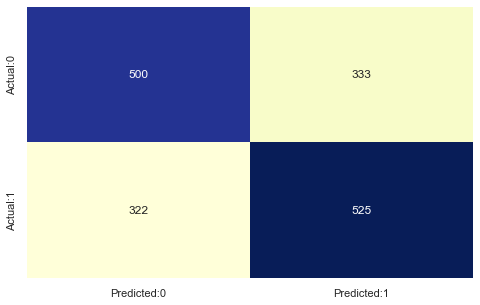

In [60]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,RandomForest_predict)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

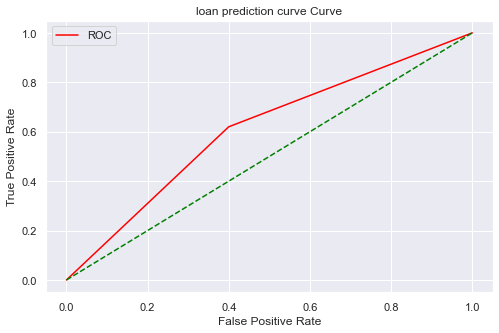

In [83]:
from sklearn.metrics import roc_curve
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('loan prediction curve Curve')
    plt.legend()
    plt.show()
#prob = RandomForest_predict[:, 1]
plt.figure(figsize = (8,5))
fper, tper, thresholds = roc_curve(y_test, RandomForest_predict)
plot_roc_curve(fper, tper)

# Logistic regression

In [74]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(penalty='l2',C=0.5)
logistic.fit(X_train,y_train)

LogisticRegression(C=0.5)

In [75]:
predic=logistic.predict(X_test)
predic

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
print(classification_report(y_test,predic))

              precision    recall  f1-score   support

           0       0.59      0.36      0.45       833
           1       0.55      0.75      0.63       847

    accuracy                           0.56      1680
   macro avg       0.57      0.56      0.54      1680
weighted avg       0.57      0.56      0.54      1680



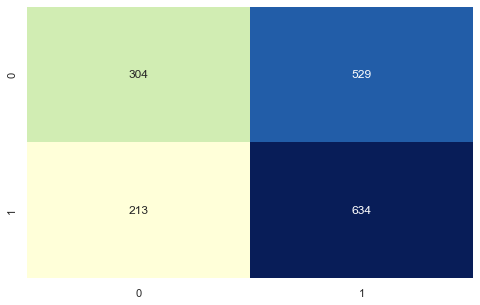

In [80]:
cm=confusion_matrix(y_test,predic)
plt.figure(figsize = (8,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

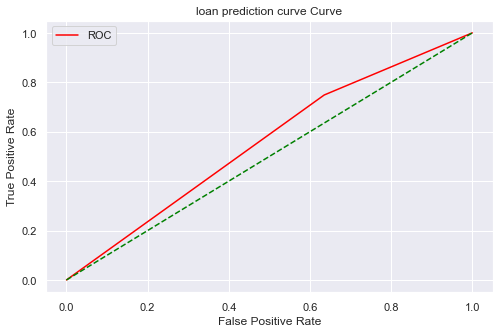

In [82]:
from sklearn.metrics import roc_curve
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('loan prediction curve Curve')
    plt.legend()
    plt.show()
#prob = RandomForest_predict[:, 1]
plt.figure(figsize = (8,5))
fper, tper, thresholds = roc_curve(y_test, predic)
plot_roc_curve(fper, tper)

# test data

In [152]:
test_data=pd.read_csv("test_4zJg83n.csv")
test_data.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,7001,29,1.0,Aadhar,636936,768240,2,2,0
1,7002,28,1.0,Aadhar,548988,693060,3,3,0
2,7003,28,1.0,Aadhar,651756,936600,0,0,0
3,7004,45,2.0,Aadhar,614676,744840,4,3,0
4,7005,48,1.0,Aadhar,625236,839400,0,0,0


In [153]:
test_data["education"]=test_data["education"].fillna(test_data["education"].mode()[0])

In [154]:
Q1=data.quantile(0.25)

Q3=data.quantile(0.75)

IQR=Q3-Q1

test_data = test_data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [155]:
test_data= pd.get_dummies(test_data,drop_first=True)
train_data.head()

,loan_id,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,proof_submitted_Driving,proof_submitted_PAN,proof_submitted_Passport,proof_submitted_VoterID
0,7001,29,1.0,636936,768240,2,2,0,0,0,0,0
1,7002,28,1.0,548988,693060,3,3,0,0,0,0,0
2,7003,28,1.0,651756,936600,0,0,0,0,0,0,0
3,7004,45,2.0,614676,744840,4,3,0,0,0,0,0
5,7006,41,1.0,608436,793200,2,2,0,0,0,0,0


In [156]:
loan_ID=test_data["loan_id"]


In [158]:
predict=Random_forest.predict(test_data)
predict

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [159]:
# create dataframe for predicted values
df = pd.DataFrame(predict)
df.rename({0:"loan_deafult"},inplace =True,axis=1)

In [160]:
df

,loan_deafult
0,0
1,0
2,0
3,0
4,0
...,...
2303,0
2304,0
2305,0
2306,1


In [161]:
## concating the predicted values with id
dataframe  = pd.DataFrame()
dataframe = pd.concat([loan_ID.reset_index(drop=True),df.reset_index(drop=True)],axis=1)
dataframe

,loan_id,loan_deafult
0,7001,0
1,7002,0
2,7003,0
3,7004,0
4,7006,0
...,...,...
2303,9996,0
2304,9997,0
2305,9998,0
2306,9999,1


In [162]:
dataframe.to_csv("loan_deafult.csv",index=False)